## 統計学基礎の基礎：サンプリング

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import numpy.random as rd
import pandas as pd
import html5lib, time, sys
from datetime import datetime as dt
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
import cPickle as pickle


### 10万件のサンプルデータを生成

In [17]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(2139)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=1000000)

### ヒストグラムの描画

average:30.0039319799


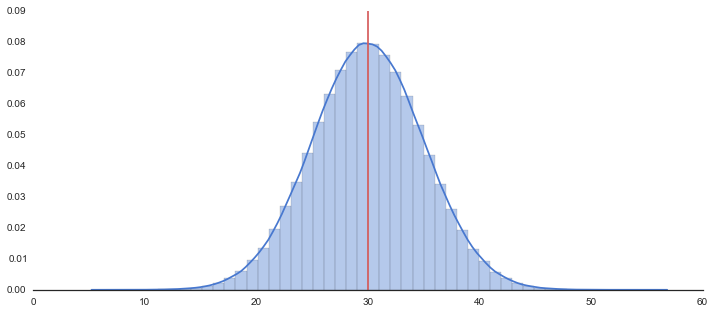

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="b")

# Calculate average
m = np.mean(d)
print "average:{}".format(m)
plt.plot([m,m],[0,0.09], 'r')

plt.show()

### 10万件から100個サンプリングする

In [33]:
df = pd.DataFrame(d, columns=['data'])
sample = df.sample(n=100)
sample

,data
338484,33.823061
523059,35.034744
619990,29.736757
944242,28.159375
929308,20.461649
699158,33.381174
306387,31.688598
321585,29.779003
335291,19.609978
669944,35.411364


### 100個のヒストグラム

average:data    31.211639
dtype: float64


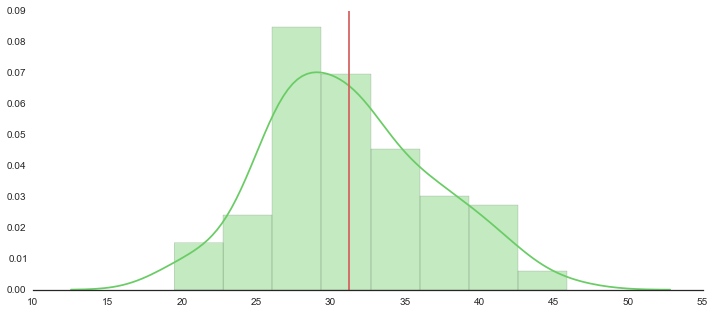

In [20]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g")

# Calculate average
m = np.mean(sample)
print "average:{}".format(m)
plt.plot([m,m],[0,0.09], 'r')
plt.xlim(10,55)
plt.show()

### たくさん書いて眺めてみる

(0,0) (0,1) (0,2) (0,3) (1,0) (1,1) (1,2) (1,3) (2,0) (2,1) (2,2) (2,3) (3,0) (3,1) (3,2) (3,3)


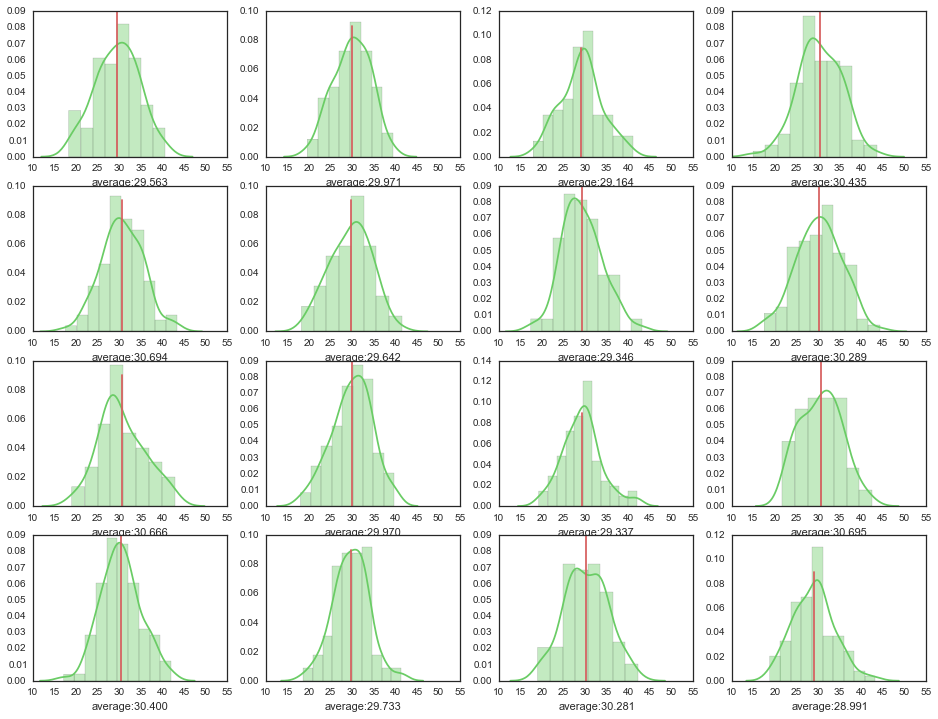

In [36]:
ncol = 4
nrow = 4

f, axes = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*3))

for i in range(nrow):
    for j in range(ncol):
        print "({},{})".format(i, j), 
        sample = df.sample(n=100)
        m = np.mean(sample)
        sns.distplot(sample, hist=True, kde=True, rug=False, color="g", ax=axes[i, j], 
                     axlabel="average:{0:.3f}".format(float(m)))
        axes[i, j].plot([m,m],[0,0.09], 'r')
        axes[i, j].set_xlim(10,55)


### さらにたくさん(1000回)サンプリングして、その平均値を集めてみる

In [24]:
%time ave_list = [np.mean(df.sample(n=100)) for _ in range(1000)]

CPU times: user 3min 7s, sys: 10.1 s, total: 3min 17s
Wall time: 3min 21s


### 1000個の平均値でヒストグラムを描いてみる

average:29.9910112788


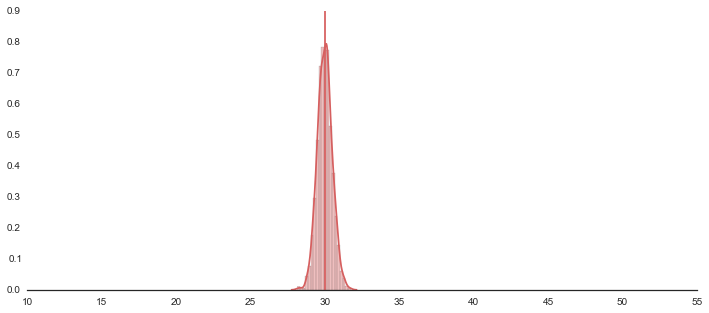

In [31]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
print "average:{}".format(m)
plt.plot([m,m],[0,0.9], 'r')
plt.xlim(10,55)
plt.show()